In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('survey_results_public.csv')

In [169]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [170]:
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [171]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [173]:
# df=df.dropna()
print(df.columns)


Index(['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'Salary'], dtype='object')


In [174]:
df['Employment'].unique()

array(['Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Employed, full-time;Student, full-time',
       'Student, part-time;Employed, part-time',
       'Student, full-time;Independent contractor, freelancer, or self-employed',
       'Retired',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Not employed, but looking for work', 'Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Student, full-time;Employed, part-time',
       'Employed, full-time;Employed, part-time',


In [175]:
# Use boolean indexing to filter for full-time employees
df = df[df["Employment"] == "Employed, full-time"]

# Drop the 'Employment' column
df = df.drop(columns=["Employment"])

# Check the DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17586 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17586 non-null  object 
 1   EdLevel       17586 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17586 non-null  float64
dtypes: float64(1), object(3)
memory usage: 687.0+ KB


In [176]:
# Counting the occurrences of each country in the dataset
df['Country'].value_counts()

Country
United States of America                                3911
Germany                                                 1493
United Kingdom of Great Britain and Northern Ireland    1147
Ukraine                                                 1026
India                                                    842
                                                        ... 
Guyana                                                     1
Sierra Leone                                               1
Namibia                                                    1
Benin                                                      1
Mali                                                       1
Name: count, Length: 155, dtype: int64

In [177]:
def filterShortCountries(categories,threshold):
    catMap = {}
    for i in range(len(categories)):
        if categories.values[i] >=threshold:
            catMap[categories.index[i]]=categories.index[i]
        else:
            catMap[categories.index[i]]='Other'
    return catMap

In [178]:
shortCountryMap = filterShortCountries(df.Country.value_counts(),400)
df["Country"]=df["Country"].map(shortCountryMap)
df.Country.value_counts()

Country
Other                                                   5642
United States of America                                3911
Germany                                                 1493
United Kingdom of Great Britain and Northern Ireland    1147
Ukraine                                                 1026
India                                                    842
France                                                   720
Canada                                                   685
Brazil                                                   460
Spain                                                    435
Italy                                                    416
Netherlands                                              408
Australia                                                401
Name: count, dtype: int64

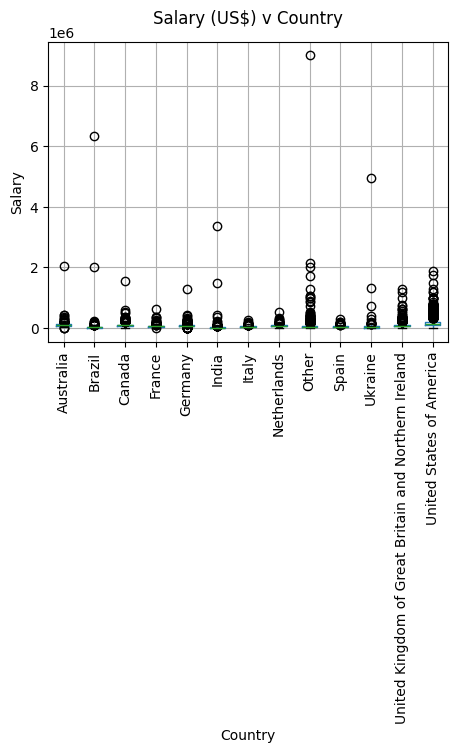

In [179]:
fig,ax =plt.subplots(1,1,figsize=(5,4))
df.boxplot(column='Salary',by='Country',ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title(' ')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [180]:
df=df[df["Salary"] <= 250000]
df=df[df["Salary"] >=  10000]
df=df[df["Salary"] != 'Other']

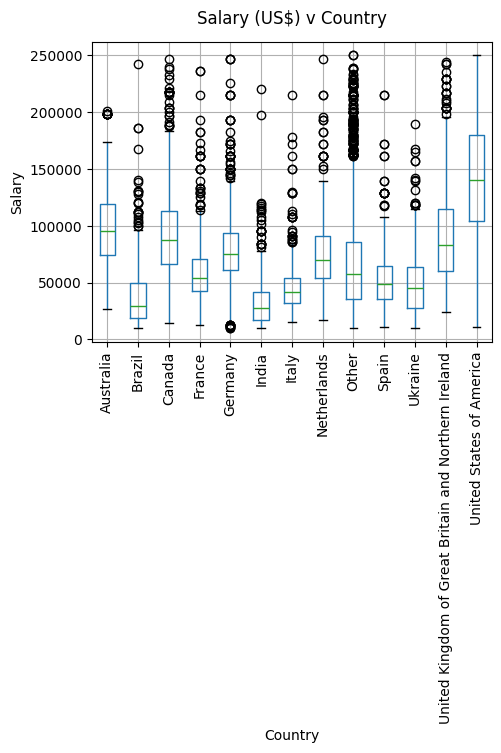

In [181]:
fig,ax =plt.subplots(1,1,figsize=(5,4))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title(' ')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [182]:
df["YearsCodePro"].unique()
# print(df["YearsCodePro"])

array(['6', '18', '25', '30', '20', '50', '27', '1', '15', '11', '23',
       '17', '10', '8', '12', '26', '9', '40', '4', '14', '7', '22', '28',
       '44', '13', '16', '3', '35', '5', '31', '41', '36',
       'Less than 1 year', '24', '2', '38', '32', '21', '19', '34', nan,
       '29', '43', '33', '45', '37', '42', '39', '46', '49', '48', '47'],
      dtype=object)

In [183]:
# Func for Years of CodePro
def cleanYear(x):
    if x== 'More than 50 years':
        return 50
    if x=='Less than 1 year':
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(cleanYear)

In [184]:
df["EdLevel"].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [185]:
# Function to clean the education levels
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    if ('Some college/university' in x or 
        'Secondary school' in x or 
        'Associate degree' in x or 
        'Primary/elementary school' in x or 
        'Something else' in x):
        return 'Less than a Bachelors'
    return 'Less than a Bachelors'  # Handle any unexpected values

# Apply the function to the 'EdLevel' column
df['EdLevel'] = df['EdLevel'].apply(clean_education)

# Check the unique values in the 'EdLevel' column
print(df['EdLevel'].unique())


['Post grad' 'Master’s degree' 'Less than a Bachelors' 'Bachelor’s degree']


In [186]:
df["EdLevel"].unique()

array(['Post grad', 'Master’s degree', 'Less than a Bachelors',
       'Bachelor’s degree'], dtype=object)

In [187]:
# Transforming EdLevel and Country from category to numerical
from sklearn.preprocessing import LabelEncoder
le_edu=LabelEncoder()
df['EdLevel']=le_edu.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([3, 2, 1, 0])

In [188]:
le_country=LabelEncoder()
df["Country"] =le_country.fit_transform(df["Country"])
df["Country"].unique()

array([ 8, 11, 12,  3,  4,  1,  2,  6,  5, 10,  9,  7,  0])

In [189]:
# Drop rows with any NaN values
df_cleaned = df.dropna()

# Separate features and target
x = df_cleaned.drop("Salary", axis=1)
y = df_cleaned["Salary"]

# Fit the model
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

# Now you can check the results or make predictions


LinearRegression()

In [190]:
# predictions
y_pred = linear_reg.predict(x)

In [191]:
# Finding errors
from sklearn.metrics import mean_squared_error,mean_absolute_error
error = np.sqrt(mean_squared_error(y,y_pred))
print(error)

44651.47865117972


In [192]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [193]:
y_pred = dec_tree_reg.predict(x)

In [194]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$32,910.40


In [195]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [196]:
y_pred = random_forest_reg.predict(x)

In [197]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,004.19


In [198]:
# To find the most efficient model , which uses cross-validation
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [199]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,502.94


In [200]:
x.head()

,Country,EdLevel,YearsCodePro
374,8,3,6.0
379,8,2,6.0
392,11,3,18.0
395,11,2,25.0
398,12,1,30.0


In [204]:
df["YearsCodePro"].unique()

array([ 6. , 18. , 25. , 30. , 20. , 50. , 27. ,  1. , 15. , 11. , 23. ,
       17. , 10. ,  8. , 12. , 26. ,  9. , 40. ,  4. , 14. ,  7. , 22. ,
       28. , 44. , 13. , 16. ,  3. , 35. ,  5. , 31. , 41. , 36. ,  0.5,
       24. ,  2. , 38. , 32. , 21. , 19. , 34. ,  nan, 29. , 43. , 33. ,
       45. , 37. , 42. , 39. , 46. , 49. , 48. , 47. ])

In [209]:
# Taking the test example
x = np.array([["United States of America","Master’s degree",15.]])
x

array([['United States of America', 'Master’s degree', '15.0']],
      dtype='<U32')

In [210]:
print(le_country.classes_)
print(le_edu.classes_)

['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Other' 'Spain' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
['Bachelor’s degree' 'Less than a Bachelors' 'Master’s degree' 'Post grad']


In [211]:
x[:, 0] = le_country.transform(x[:,0])
x[:, 1] = le_edu.transform(x[:,1])
x = x.astype(float)
x

array([[12.,  2., 15.]])

In [212]:
y_pred = regressor.predict(x)
y_pred

C:\Users\91940\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([151817.5])

In [213]:
# pickle to serialize and deserialize Python objects
import pickle

In [216]:
data = {"model": regressor, "le_country": le_country, "le_edu": le_edu}
with open('saved_steps.pkl', 'wb') as file: # writing the binary mode
    pickle.dump(data, file)

In [217]:
with open('saved_steps.pkl', 'rb') as file: # reading the binary mode
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_edu"]

In [218]:
y_pred = regressor_loaded.predict(x)
y_pred

C:\Users\91940\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([151817.5])